# Risks

Since the **2008 financial crisis, risk management has become essential** in financial markets and asset management. The crisis revealed significant weaknesses in how financial institutions handled risks related to market volatility, liquidity, and asset valuation. As a result, today’s financial firms are more focused on identifying, measuring, and mitigating risks across their asset portfolios to maintain stability and ensure long-term performance in increasingly uncertain markets.

Traditional hypotheses in finance, such as the assumption that asset returns follow a normal distribution, have been proven inaccurate in practice. Real-world asset returns often exhibit **heavy-tailed distributions**, particularly on the loss side. This means that large losses are more likely to occur than what would be predicted by a normal distribution, exposing investors to greater downside risk than traditional models suggest. 


In [1]:
import numpy as np 
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from scipy.stats import skew, kurtosis, norm

plt.style.use('ggplot')


<div style="background-color: #e0f7fa; padding: 10px;">

1- Download the adjusted closing prices for a set of stock tickers from start date till finish date provided.

2- Analyze the data:

3- Calculate the daily returns for each stock and compute the average daily returns and the daily volatilities (standard deviation of returns).

4-  Create a figure with two parallel graphs (in a single row):

        One showing the average annual returns for each stock.

        One showing the annualized volatilities for each stock (annualize by multiplying the daily values by √252).

5- Create a second figure that plots the daily returns of the stock with the highest volatility and the stock with the lowest volatility, side by side, for comparison.

6- Create a figure with histograms of the daily returns for the stock with the highest volatility and the stock with the lowest volatility, side by side, for comparison.

In [35]:
tickers = ['AAPL', 'MSFT', 'BTC-USD', 'IEF', 'GLD', 'SPY']

start_date = '2015-01-01'
end_date = '2024-01-01'



**CONCLUSION: RETURNS DO NOT FOLLOW A NORMAL DISTRIBUTION.**

The tails of the distribution of returns are heavier than those of a normal distribution.

This means that extreme events (both positive and negative) are more likely to occur than would be expected if returns followed a normal distribution.

Generally, the left tail is heavier than the right tail, meaning that extreme negative events are more likely to occur than extreme positive events.

**CONSEQUENCE: IN ORDER TO PROPERLY ESTIMATE RISK, VOLATILITY IS NOT SUFFICIENT.**

While volatility is a commonly used measure of risk, it often falls short in capturing the full picture of potential losses, as it assumes a symmetric distribution of returns. To address this, additional metrics like **skewness and kurtosis** are used, which account for the asymmetry and the fat tails in return distributions. 

However, these measures can be complex to interpret, so **Value at Risk (VaR)** has become a widely accepted risk metric. VaR estimates the potential loss over a specific time period with a given confidence level, providing a more intuitive way to assess the likelihood of extreme losses.

## VALUE AT RISK VaR

The question to answer is: **HOW MUCH CAN I LOSE?**

Value at Risk (VaR) is a measure of the market risk of an asset or a portfolio of assets. It is defined as the maximum loss that an asset or a portfolio of assets is expected to suffer over a given period of time with a certain level of confidence.

For example, if the daily VaR of a stock is EUR 10 with a confidence level of 95%, this means that 95% of the days we will lose less than EUR 10.

VaR facilitates the estimation of the maximum amount that could be lost in the market, thus providing a basis for determining the **capital required to maintain the position**- .

It also provides protection against large losses due to concentration of risk that would be unacceptable.



VaR can be formally defined as:

$$ VaR_\alpha (X) = - inf \{ x \in \mathbb{R} : P(X \leq x) \leq \alpha \} $$

Where:

 -  $X$ represents the profit and loss.
  
 - $\alpha$ is the confidence level (e.g. 0.95 for 95% confidence).
 
 
 - $P$ is the probability function.

 - $inf$ denotes the infimum, providing the lowest value of $x$ for which the cumulative probability exceeds the confidence level. 

There are three methods for calculating VaR:

- **Parametric method**: Returns are assumed to follow a normal distribution.

- **Historical method**: VaR is calculated directly from historical data.

- **Simulation method**: Monte Carlo simulations are used.

### Parametric VaR

**Parametric VaR** is a technique for estimating the risk of loss of an investment portfolio. It is based on the assumption that asset returns follow a normal distribution.

**An important assumption is that the distributions are symmetric**.

The steps to calculate parametric VaR are:

- Estimate μ and σ of the returns.

- Choose the confidence level (e.g. 95%).

- Use ppf to obtain the corresponding value. The ppf function is the inverse of the Cumulative Distribution Function (CDF) for a normal distribution. We will use it to calculate the value of the random variable under the normal distribution for which the cumulative probability up to that point is 1-confidence.

- Another methodology for determining this calculation involves using the standard normal distribution, where the mean (μ) is equal to 0 and the standard deviation (σ) is 1, together with the Z-value. The latter can be defined as the number of standard deviations a given point is from the mean. Since the Value at Risk (VaR) calculation focuses exclusively on losses, thus adopting a one-sided approach, the commonly used Z-values are:

   - 95% implies $z = 1,65$
   - 99% implies $z = 2,33$

<center>
          <img src="../imgs/var95-99.PNG" alt="Por qué curso" width="700"/>
</center>

<div style="background-color: #e0f7fa; padding: 10px;">

Define a function that calculates parametric VaR for a given donfidence level.

Based on [article](https://pratham1202.medium.com/python-for-finance-4-semi-deviation-var-cvar-and-cornish-fischer-modification-6200a2d66299)

### Historical VaR

Historical VaR involves calculating, from past returns, the worst return that meets the stated confidence level.

To calculate historical VaR, the steps include determining the percentile corresponding to  of the returns

<div style="background-color: #e0f7fa; padding: 10px;">

Write a function named var_historico that calculates the historical Value at Risk (VaR) of a pandas DataFrame or Series of returns, similar to the structure of the var_gaussian function provided earlier. 

Make bar graphs to compare Parametric vs Historical VaRs

<div style="background-color: #e0f7fa; padding: 10px;">

Create a histogram of the daily returns for the IEF ticker. On the same plot, indicate the 99% Parametric VaR and the 99% Historical VaR with clearly labeled vertical lines.

Afterward, interpret the results by comparing the two VaR measures and discussing any differences observed.

INTERPRETATION OF THE GRAPH:

1- **Parametric Var** is the VaR calculated using the parametric method, i.e. assuming that returns follow a normal distribution.

Parametric Var tells us that there is a 99% probability that the stock will lose less than 0.96% in a day.

2- **Historical Var** is the VaR calculated using the non-parametric method, i.e. using historical data.

Historical Var tells us that there is a 99% probability that the stock loses less than 1.05% in a day.

In other words, we **make an error in calculating the 0.08%** risk by assuming that returns follow a normal distribution.

But what happens if we use assets whose return distributions do not resemble a normal distribution?

<div style="background-color: #e0f7fa; padding: 10px;">

Repeat the previous exercise using the BTC-USD ticker. Plot the histogram of daily returns and indicate the 99% Parametric VaR and 99% Historical VaR with clearly labeled vertical lines.

Interpret the results by comparing the two VaR measures.

The main problem with Value at Risk (VaR) is that it does not consider the distribution of losses above the VaR threshold, i.e. it does not provide information on the magnitude of extreme losses. Proposed solutions include:

- **Cornish-Fisher extension**, which adjusts VaR to account for skewness and kurtosis of the distribution of returns.

- Other measures such as **CVaR** (Conditional Value at Risk) or **EVaR** (Expected Value at Risk) These measures provide a more complete picture by averaging losses in excess of VaR, i.e. they consider what happens in the tail of the loss distribution beyond the VaR point.

### The Cornish-Fisher expansion of parametric VaR [original paper](https://digital.library.adelaide.edu.au/dspace/bitstream/2440/15229/1/148.pdf)

The Cornish-Fisher expansion is a mathematical method used to adjust the Value-at-Risk (VaR) calculation by taking into account the skewness (skewness) and kurtosis (measure of heavy or light tails) of the distribution of returns of an asset or portfolio. Traditionally, VaR assumes a normal distribution of returns, which may not be realistic for many financial assets that exhibit more complex risk behaviours.

The calculation of Value-at-Risk (VaR) using the Cornish-Fisher expansion modifies the standard normal z-score to adjust for the skewness (skewness) and kurtosis (kurtosis) of the distribution of returns. The idea is to correct the standard normal approximation of VaR to reflect the actual shape of the distribution of returns, especially in the tails.

Here is the mathematical formula for calculating the adjusted z-score:

$$ z_{\text{adjusted}} = z + \frac{1}{6}(z^2 - 1)S + \frac{1}{24}(z^3 - 3z)K - \frac{1}{36}(2z^3 - 5z)S^2 $$



where:

 - $ z $ is the standard normal z-score corresponding to the VaR confidence level (e.g. -1.645 for 95% confidence).
 - $ S $ is the coefficient of skewness of the return distribution.
 - $ K $ is the excess kurtosis of the return distribution.

 Once the $ z_{\text{adjusted}} $, can be used to calculate the Cornish-Fisher adjusted VaR as follows:

$$ \text{VaR}_{\text{adjusted}} = \mu + z_{\text{adjusted}} \sigma $$


where:

- $ \mu $ is the average of the returns. 
- $ \sigma $  is the standard deviation of the returns.

This method provides a VaR that takes into account the actual shape of the distribution of returns, providing a more accurate measure of risk in non-normal distributions.

Let us calculate the modified VaR for an asset with returns ‘resembling a normal distribution’ such as IEF and one that does not such as Bitcoin.

In [17]:
mu_IEF = means ['IEF']
mu_BTC = means ['BTC-USD']

std_IEF = stds ['IEF']
std_BTC = stds ['BTC-USD']

skew_IEF = skew(returns['IEF'])
skew_BTC = skew(returns['BTC-USD'])

kurt_IEF = kurtosis(returns['IEF'])
kurt_BTC = kurtosis(returns['BTC-USD'])

In [18]:
z_95 = 1.65
z_99 = 2.33

z_IEF_adjusted_95 = z_95 + 1/6*(z_95**2 - 1) * skew_IEF + 1/24*(z_95**3 - 3*z_95) * kurt_IEF - 1/36* (2*z_95**3 - 5*z_95) * skew_IEF**2
z_IEF_adjusted_99 = z_99 + 1/6*(z_99**2 - 1) * skew_IEF + 1/24*(z_99**3 - 3*z_99) * kurt_IEF - 1/36* (2*z_99**3 - 5*z_99) * skew_IEF**2

z_BTC_adjusted_95 = z_95 + 1/6*(z_95**2 - 1) * skew_BTC + 1/24*(z_95**3 - 3*z_95) * kurt_BTC - 1/36* (2*z_95**3 - 5*z_95) * skew_BTC**2
z_BTC_adjusted_99 = z_99 + 1/6*(z_99**2 - 1) * skew_BTC + 1/24*(z_99**3 - 3*z_99) * kurt_BTC - 1/36* (2*z_99**3 - 5*z_99) * skew_BTC**2


In [19]:
var_95_IEF_ajus = mu_IEF + std_IEF * z_IEF_adjusted_95

print(f"IEF VaR 95 is {100*var_95_gauss['IEF']:.3f} and adjusted VaR 95 is {100*var_95_IEF_ajus:.3f}")

IEF VaR 95 is 0.694 and adjusted VaR 95 is 0.696


In [20]:
var_99_IEF_ajus = mu_IEF + std_IEF * z_IEF_adjusted_99
print(f"IEF VaR 99 is {100*var_99_gauss['IEF']:.2f} and adjusted VaR 99 is {100*var_99_IEF_ajus:.2f}")

IEF VaR 99 is 0.98 and adjusted VaR 99 is 1.37


In [21]:
var_95_BTC_ajus = mu_BTC + std_BTC * z_BTC_adjusted_95

print(f"BTC VaR 95 is {100*var_95_gauss['BTC-USD']:.3f}and adjusted VaR 95 is{100*var_95_BTC_ajus:.3f}")

BTC VaR 95 is 7.103and adjusted VaR 95 is5.847


In [22]:
var_99_BTC_ajus = mu_BTC + std_BTC * z_BTC_adjusted_99

print(f"BTC VaR 99 is {100*var_99_gauss['BTC-USD']:.3f} and adjusted is {100*var_99_BTC_ajus:.3f}")

BTC VaR 99 is 10.136 and adjusted is 17.377


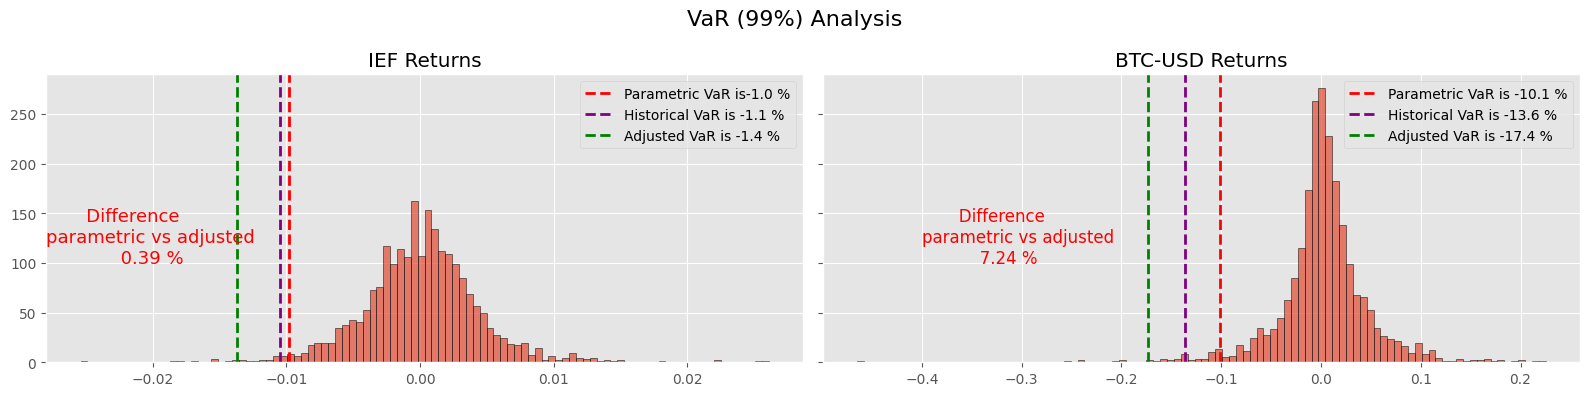

In [23]:

fig, axes = plt.subplots(1, 2, figsize=(16, 4), sharey='row')
axes[0].hist(returns['IEF'], bins=100, edgecolor='black', alpha=0.7)
#axes[0].axvline(x=var1_90, color='green', linestyle='--', linewidth=2, label=f'VaR (90%) es {100 * var1_90:.1f} %')
axes[0].axvline(x=-var_99_gauss['IEF'], color='red', linestyle='--', linewidth=2, label=f"Parametric VaR is{100 * -var_99_gauss['IEF']:.1f} %")
axes[0].axvline(x=-var_99_hist['IEF'], color='purple', linestyle='--', linewidth=2, label=f"Historical VaR is {100 * -var_99_hist['IEF']:.1f} %")
axes[0].axvline(x=-var_99_IEF_ajus, color='green', linestyle='--', linewidth=2, label=f"Adjusted VaR is {100 * -var_99_IEF_ajus:.1f} %")
axes[0].text(-0.028, 100, f"       Difference \nparametric vs adjusted\n             {100 *np.abs(-var_99_gauss['IEF']--var_99_IEF_ajus):.2f} %", fontsize=13, color='RED')

axes[0].set_ylabel('')
axes[0].set_title('IEF Returns')
axes[0].legend()

axes[1].hist(returns['BTC-USD'], bins=100, edgecolor='black', alpha=0.7)
#axes[1].axvline(x=var2_90, color='green', linestyle='--', linewidth=2, label=f'VaR (90%) es {100 * var2_90:.1f} %')
axes[1].axvline(x=-var_99_gauss['BTC-USD'], color='red', linestyle='--', linewidth=2, label=f"Parametric VaR is {100 * -var_99_gauss['BTC-USD']:.1f} %")
axes[1].axvline(x=-var_99_hist['BTC-USD'], color='purple', linestyle='--', linewidth=2, label=f"Historical VaR is {100 * -var_99_hist['BTC-USD']:.1f} %")
axes[1].axvline(x=-var_99_BTC_ajus, color='green', linestyle='--', linewidth=2, label=f"Adjusted VaR is {100 * -var_99_BTC_ajus:.1f} %")
axes[1].text(-0.4, 100, f"       Difference \nparametric vs adjusted\n           {100 *np.abs(-var_99_gauss['BTC-USD']--var_99_BTC_ajus):.2f} %", fontsize=12, color='RED')

axes[1].set_ylabel('')
axes[1].set_title('BTC-USD Returns')
axes[1].legend()


plt.suptitle('VaR (99%) Analysis', fontsize=16)  # Título general
plt.tight_layout()
plt.show()

### CVAR

+ VaR has a problem: it does not consider how returns are below the VaR. That is, two assets can have the same VaR but one can have very negative returns and the other not.

+ To solve this problem, CVaR or Conditional Value at Risk is used. The CVaR is the **average of the returns that are below the VaR**.

In more practical terms, the CVaR answers the question: **If the loss exceeds the VaR, how much do we expect to lose on average?**

<div style="background-color: #e0f7fa; padding: 10px;">

Calculate  IEF CVaR at 95% and 99% and grapf Var and CVaR at 99%